# PCA and Multivariate Polynomial Regression on the Boston Dataset

 Boston Housing dataset is composed of 506 samples of a population census perfomed in the city of Boston. There are 14 features and the response variable 'y' is of real type, indicating the median price for houses in Boston. First, we are going to reduce the dataset dimensionality to 3, so that we can visualize it. Before we use PCA, it is important to centralize the mean and standardize the data. This is important as feature imbalance can lead to PCA giving distorted priorities to some features.

 If we check the explained variance of the reduced Boston Housing dataset, we see that 3 components cover approximately 68% of the original data variance. This is a low yet reasonable rate, indicating that the dimensionality reduction may negatively impact performance. As we can tell that 3 PCA components are not a good representation of the original data, we can retry with more components.

Explained variance: [6.1389812  1.43611329 1.2450773 ]
Explained variance percentage: [0.47129606 0.11025193 0.0955859 ]


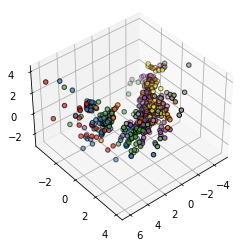

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
  
from mpl_toolkits.mplot3d import Axes3D

# load from sklearn repository, but the dataset is also available at this notebook
# repository, if needed
data = datasets.load_boston()
x = data.data
y = data.target

# rescale to get a centered mean and unit standard deviation
xs = StandardScaler().fit_transform(x)

# reduce dimensionality to 3 so that we can visualize in a 3D plot
pca = PCA(n_components=3)
xpca = pca.fit_transform(xs)

# show model's explained variance
print("Explained variance: " + str(pca.explained_variance_))
print("Explained variance percentage: " + str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xpca[:, 0], xpca[:, 1], xpca[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')
ax.view_init(elev=40, azim=50)



---

In this case, following the same process used in the previous item, we take the 4 principal components using PCA. This time we manage to achieve 75% explained variance. With a 7% increase in the explained variance ratio, this is not a good rate of representativeness yet, a somewhat limited componential reduction.

In [7]:
# nova instancia reponsavel pelo PCA com 4 componentes, analoga a anterior com 3
pca4 = PCA(n_components=4)
xpca4 = pca4.fit_transform(xs)

print("Explained variance: " + str(pca4.explained_variance_))
print("Explained variance percentage: " + str(pca4.explained_variance_ratio_))

Explained variance: [6.1389812  1.43611329 1.2450773  0.85927328]
Explained variance percentage: [0.47129606 0.11025193 0.0955859  0.06596732]



---

As we want to avoid the costs of using data with many dimensions in our polynomial regression, we can analyze both reductions with 3 and 4 components to see the quality of our regression in practice.

First, we perform a regression using a linear function to both reduced datasets. We can see that the R2 score for our model is a negative value in both cases. This indicates that our model is worse than a model always predicting the average value for the target variable. (R2 score < 0: worse than average; R2 = 0: average; R2 > 0: better than average; R2 = 1: perfect model)

This result can either be understood as an effect of the dimensionality reduction or an effect of a limited regression.

Although if we look at the data plot, we can see many different colors for points all over the space, there is a tendency to have only 2 clusters. This may indicate that a quadratic model may fit well enough to the data, if it can go through both clusters.

In [22]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# instantiate the linear regression model to work with the dataset with 3 dimensions
model = LinearRegression(fit_intercept=False)
model.fit(xpca, y)

y_pred = model.predict(xpca)

print("Model estimated coefficients running with 3 components: ") 
print(model.coef_)

# get R2 score fot the model. Best R2 is 1, average performance is 0, negative is below average performance
r2 = r2_score(y, y_pred)
print("\nR2 score for the model running with 3 components: "  + str(r2.round(2)))


# repeat linear regression using the 4 components dataset
model.fit(xpca4, y)

print("\n\nModel estimated coefficients running with 4 components: ") 
y_pred = model.predict(xpca4)

print(model.coef_)

r2 = r2_score(y, y_pred)
print("\nR2 score for the model running with 4 components: "  + str(r2.round(2)))

Model estimated coefficients running with 3 components: 
[-2.2707716   2.19274359  3.49752573]

R2 score for the model running with 3 components: -5.38


Model estimated coefficients running with 4 components: 
[-2.2707716   2.19274359  3.49752573 -1.07961544]

R2 score for the model running with 4 components: -5.37




---

To understand what is limiting our models, we run another regression model on the data. This time, we use a quadratic function after we compute the quadratic features for both datasets.

With the use of a quadratic function, there is a significant improvement in the quality of our regression model. The model trained in the 3-dimensional dataset achieves a R2 score of approximately 0.7, while the model fit to the 4-dimensional dataset reaches 0.75. Since the maximum R2 score is 1, we can say that even with the dimensionality reduction, a quadratic regression can reach a reasonably good result.

Note that after using the main 4 components of the data, we only reach 75% of explained variance. This shows us that most variables in the Boston Housing dataset carry valuable information together. If a higher performance model is desired, dimensionality reduction should be avoided.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

# get the quadratic features from the 3 component dataset
p = PolynomialFeatures(degree=2)
p_transf = p.fit_transform(xpca)

# perform a regression using the quadratic features
model = LinearRegression(fit_intercept=False)
model.fit(p_transf, y)

y_pred = model.predict(p_transf)

print("Model estimated coefficients running with 3 components: ")
print(model.coef_)

r2 = r2_score(y, y_pred)
print("\nR2 score for the model running with 3 components: "  + str(r2.round(2)))


# nova instanciacao da funcao polinomial e de um novo modelo regressivo
p = PolynomialFeatures(degree=2)

p_transf4 = p.fit_transform(xpca4)

# repeat quadratic regression using the 4 components dataset
model.fit(p_transf4, y)

y_pred = model.predict(p_transf4)

print("\n\nModel estimated coefficients running with 4 components: ")
print(model.coef_)

# exibe o score R2 do modelo
r2 = r2_score(y, y_pred)
print("\nR2 score for the model running with 4 components: "  + str(r2.round(2)))

Model estimated coefficients running with 3 components: 
[24.58606425 -1.88536482  0.67555447  4.27041613 -0.31376087 -0.33592417
 -0.73636825 -0.32467889  0.46055433  0.26915917]

R2 score for the model running with 3 components: 0.7


Model estimated coefficients running with 4 components: 
[24.45395538 -1.97006295  0.9993451   4.51806697  1.06157236 -0.34852653
 -0.36213226 -0.65630418  0.84668697 -0.2157195   0.09394609 -1.11229763
  0.33029987  0.04351793  0.13173143]

R2 score for the model running with 4 components: 0.75
